<a href="https://colab.research.google.com/github/adityasingh1993/ML-DL-AI-LearnAndTry/blob/main/LLM/FinanceClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

Financial-QA-10k.csv.zip  sample_data


In [2]:
!unzip Financial-QA-10k.csv.zip

Archive:  Financial-QA-10k.csv.zip
  inflating: Financial-QA-10k.csv    


In [39]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import spacy
from spacy.lang.en import stop_words

# nltk.download('all')

In [4]:
all_stop_word=stop_words.STOP_WORDS

In [5]:
"be" not in all_stop_word

False

In [6]:

nlp = spacy.load("en_core_web_sm")


In [7]:
txt=nlp("hi this is Aditya")

In [8]:
for ent in txt:
  if ent.text not in list(all_stop_word):
    print(ent, ent.lemma_)


hi hi
Aditya Aditya


### Load dataframe

In [9]:
df=pd.read_csv("Financial-QA-10k.csv")

In [10]:
df.head(2)

,question,answer,context,ticker,filing
0,What area did NVIDIA initially focus on before...,NVIDIA initially focused on PC graphics.,"Since our original focus on PC graphics, we ha...",NVDA,2023_10K
1,What are some of the recent applications of GP...,Recent applications of GPU-powered deep learni...,Some of the most recent applications of GPU-po...,NVDA,2023_10K


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  6998 non-null   object
 1   answer    6998 non-null   object
 2   context   6999 non-null   object
 3   ticker    7000 non-null   object
 4   filing    7000 non-null   object
dtypes: object(5)
memory usage: 273.6+ KB



## Lets do some exploartaion

### check the length of each columns

<Axes: ylabel='Frequency'>

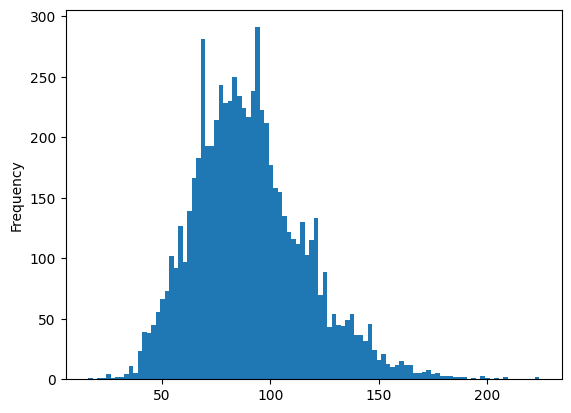

In [12]:
df["question"].str.len().plot(kind='hist',bins=100)

Text(0.5, 0, 'length->')

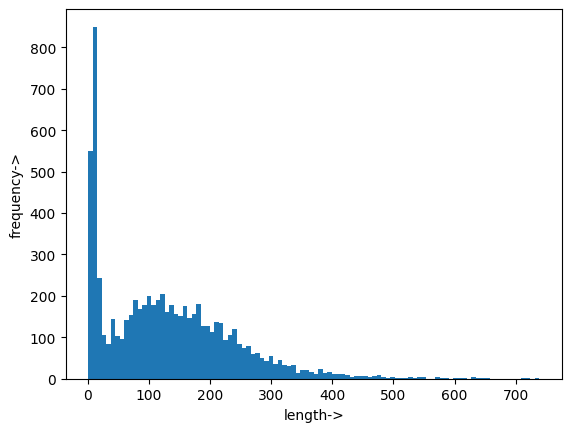

In [13]:
df["answer"].str.len().plot(kind='hist',bins=100)
plt.ylabel("frequency->")
plt.xlabel("length->")

(0.0, 1000.0)

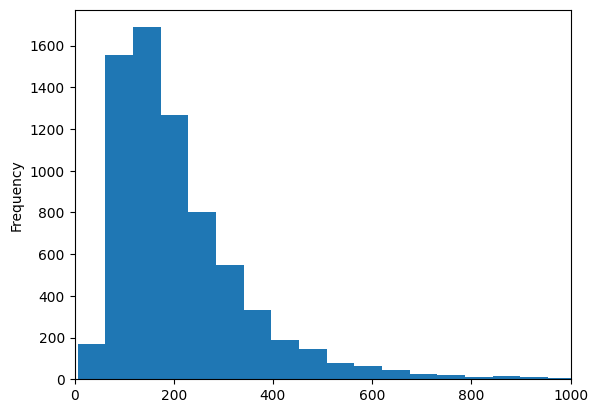

In [14]:
df["context"].str.len().plot(kind='hist',bins=100)
plt.xlim((0,1000))

<Axes: ylabel='Frequency'>

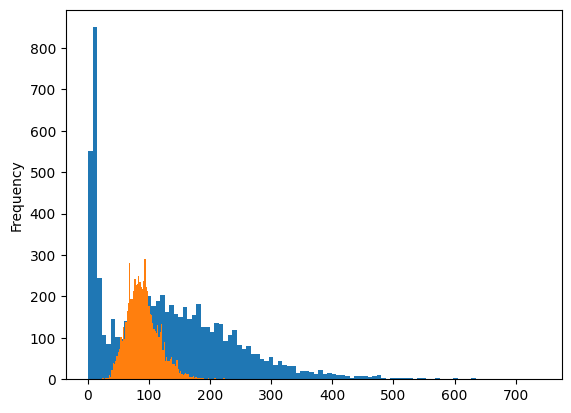

In [20]:
df["answer"].str.len().plot(kind='hist',bins=100)
df["question"].str.len().plot(kind='hist',bins=100)

In [21]:
df.columns

Index(['question', 'answer', 'context', 'ticker', 'filing'], dtype='object')

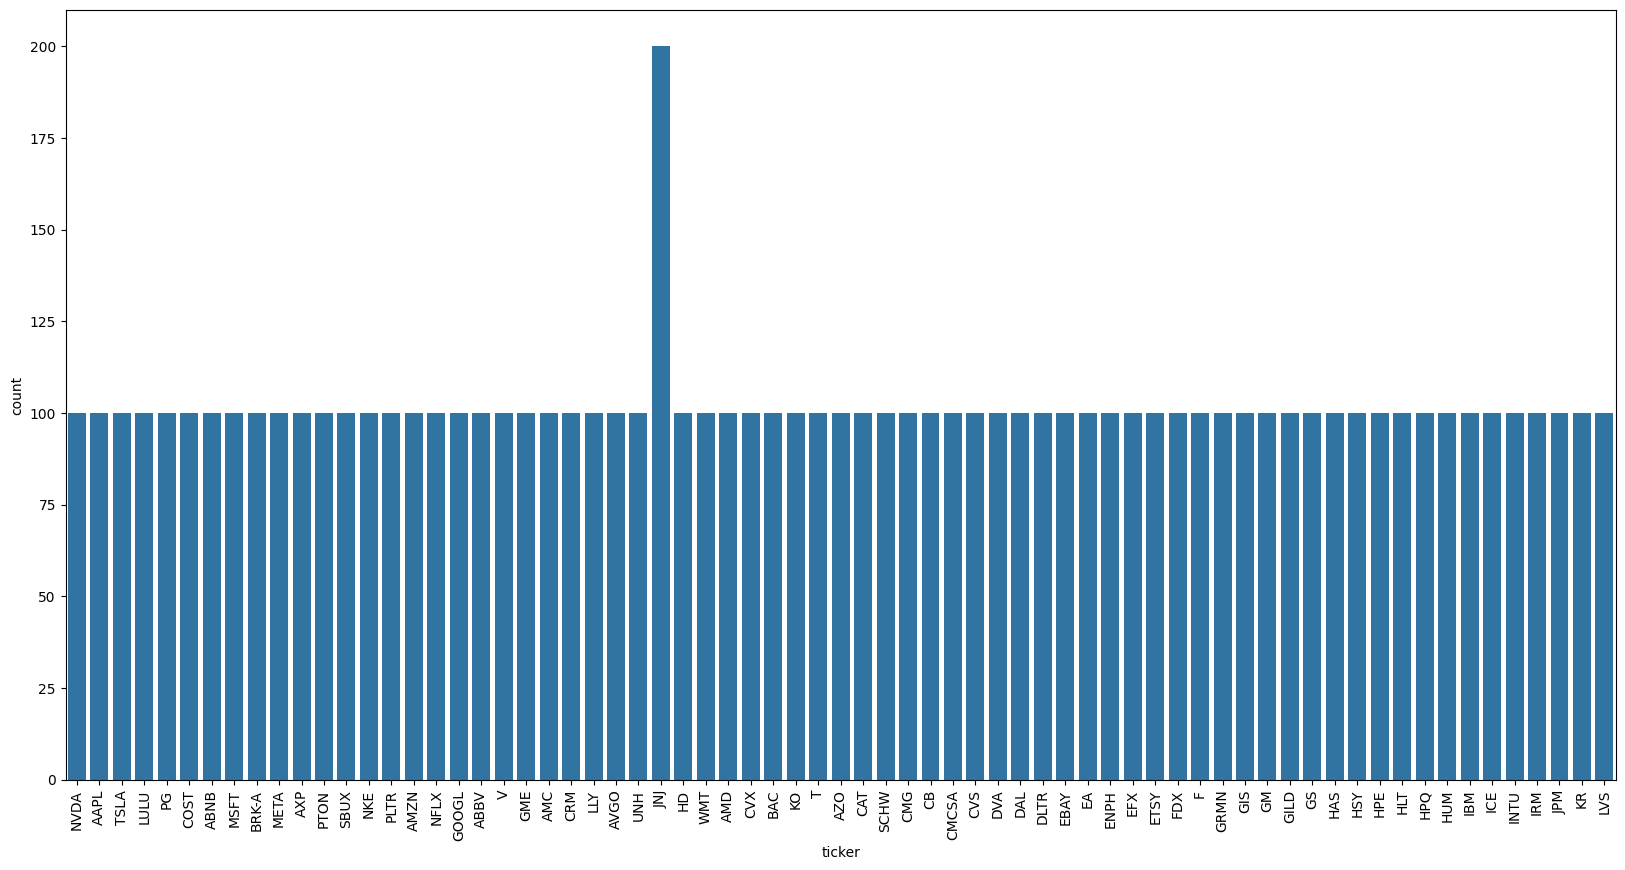

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='ticker')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='count'>

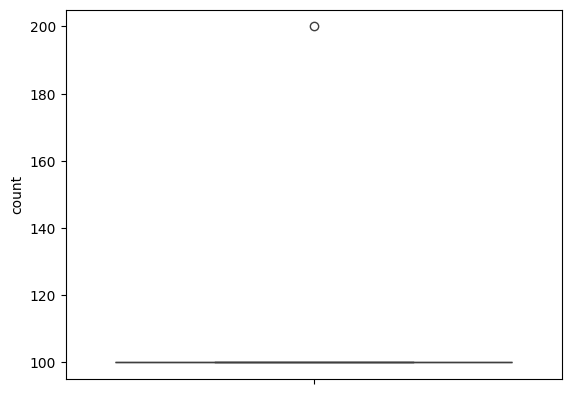

In [23]:
sns.boxplot(y=df["ticker"].value_counts().reset_index()["count"])

In [24]:
df["question"].iloc[0].translate(str.maketrans('','',string.punctuation))

'What area did NVIDIA initially focus on before expanding to other computationally intensive fields'

In [25]:
# stopwords('english').words

In [26]:

def remove_punctuation(text):
  try:
    text=text.translate(str.maketrans('','',string.punctuation)).lower()
    txt=nlp(text)
    res=[]
    for ent in txt:
      if ent.text not in list(all_stop_word):
          res.append(ent.lemma_)
    return " ".join(res)
  except:
    print(f"text: {text}")
    return ''


In [27]:
df["clean_context"]=df["context"].apply(lambda x:remove_punctuation(x))
df["clean_answer"]=df["context"].apply(lambda x:remove_punctuation(x))

text: nan
text: nan


In [28]:
def check_common_words(answer,context):
  try:
    return (len(set(answer.split(' ')).intersection(set(context.split(' '))))/len(answer.split(' ')))*100
  except Exception as ex:
    print(f"exeption: {ex}")
    return 100

In [29]:
df["answer_context_commonword"]=df.apply(lambda x: check_common_words(x.clean_answer,x.clean_context),axis=1)

<Axes: ylabel='Frequency'>

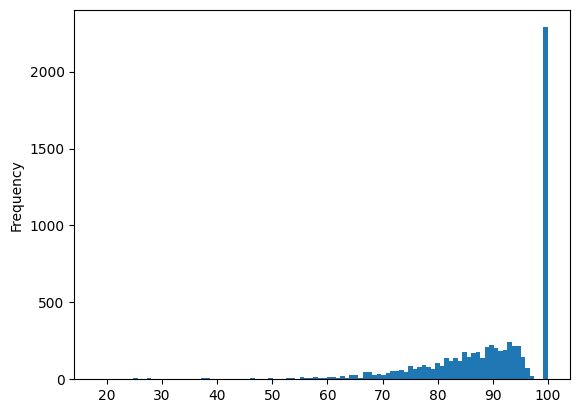

In [30]:
df["answer_context_commonword"].plot(kind='hist',bins=100)

In [31]:
df[["answer_context_commonword"]].describe()

,answer_context_commonword
count,7000.000000
mean,88.687975
std,12.790089
min,18.181818
25%,83.333333
50%,91.666667
75%,100.000000
max,100.000000


In [32]:
from scipy.stats import ttest_ind

In [33]:
unique_ticker=list(df["ticker"].unique())

In [34]:
for tck in unique_ticker:
  print(ttest_ind(df[df['ticker']==tck]['answer_context_commonword'],df[df['ticker']!=tck]['answer_context_commonword']))

TtestResult(statistic=-4.276571136616607, pvalue=1.9231756359936535e-05, df=6998.0)
TtestResult(statistic=-8.641012282795248, pvalue=6.826019136136106e-18, df=6998.0)
TtestResult(statistic=-4.229860102558205, pvalue=2.3681793405324152e-05, df=6998.0)
TtestResult(statistic=-13.412109387081841, pvalue=1.6206746676954929e-40, df=6998.0)
TtestResult(statistic=-4.371868496189104, pvalue=1.2497017901322691e-05, df=6998.0)
TtestResult(statistic=-10.184765740093054, pvalue=3.418385063318021e-24, df=6998.0)
TtestResult(statistic=-8.753100909185658, pvalue=2.569971117199672e-18, df=6998.0)
TtestResult(statistic=-4.505112584333175, pvalue=6.741512860054059e-06, df=6998.0)
TtestResult(statistic=-4.13737593487351, pvalue=3.554163246653598e-05, df=6998.0)
TtestResult(statistic=-2.310778617728844, pvalue=0.020874014599651155, df=6998.0)
TtestResult(statistic=-1.1686352526591666, pvalue=0.2425904266312695, df=6998.0)
TtestResult(statistic=-2.508571918470114, pvalue=0.012144462386751747, df=6998.0)
Tte

### From the above figure, we can assume, most of the answers word has been captured in the context. Mean is 88%

### Further we can try checking the n-gram method, jsut like Rouge to check if answer lies in context or not

## Now further we can do one more step of preprocessing of remove stopwords and contractions

## Further we can go for modelling. For modelling we can take any of the following 3 ways
<li> TFIDVectorizer and mlalgorithm like xgboost or Randomforest </li>
<li> WordEmbeddings and LSTM </li>
<li> Bert based Classification Model </li>


## **TFIDFVectorizer and Machine learning**





In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb

In [35]:
X_train, X_test, Y_train, Y_test= train_test_split(df["clean_context"]+df["clean_answer"],df["ticker"])

In [45]:
oh=OneHotEncoder(sparse_output=False)

Y_train1=oh.fit_transform(Y_train.iloc[:].values.reshape(-1,1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lc=LabelEncoder()
Y_train2=lc.fit_transform(Y_train.iloc[:].values.reshape(-1,1))

In [46]:
Y_train1.shape

(5250, 69)

In [37]:
tfidf=TfidfVectorizer()


In [42]:
X_train_tfid=tfidf.fit_transform(X_train)

In [40]:
model1=xgb.XGBClassifier(n_estimator=200)
model2=xgb.XGBClassifier(n_estimator=200)

In [ ]:
model1.fit(X_train_tfid,Y_train1)

In [ ]:
#
model2.fit(X_train_tfid,Y_train2)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:44:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


In [41]:
y_pred1=model1.predict(tfidf.transform(X_test))
y_pred2=model2.predict(tfidf.transform(X_test))

NotFittedError: need to call fit or load_model beforehand

In [ ]:
accuracy_score(on.transform(Y_test), y_pred1)

In [ ]:
accuracy_score(on.transform(Y_test), y_pred2)